In [18]:
from openforcefield.topology import Molecule
import qcengine
import qcelemental as qcel
from qcelemental.models import AtomicInput
from qcelemental.models.common_models import Model
from openeye import oequacpac, oechem, oeomega

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import pickle

In [93]:
data = None
# loading pickle file
with open('xtb_am1_benchmark.pickle', 'rb') as handle:
    data = pickle.load(handle)

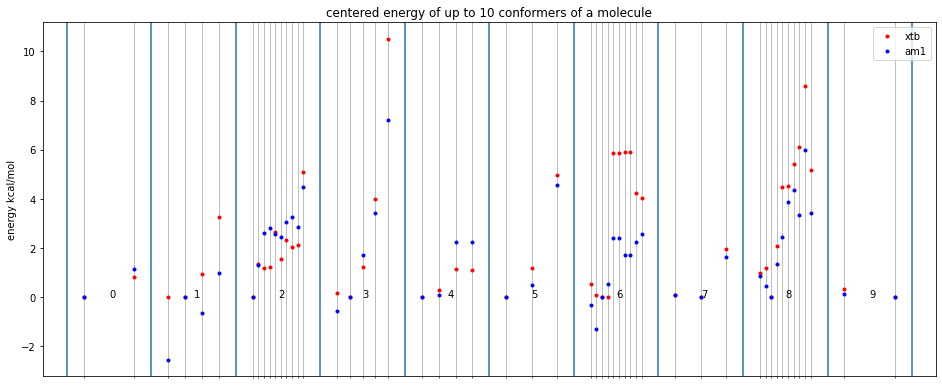

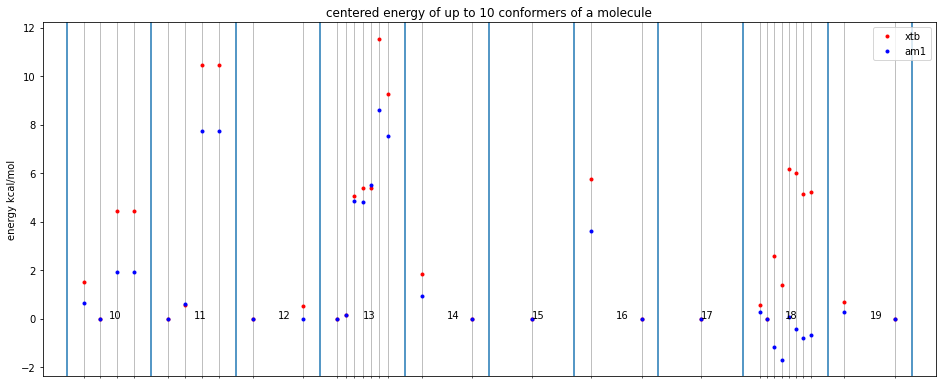

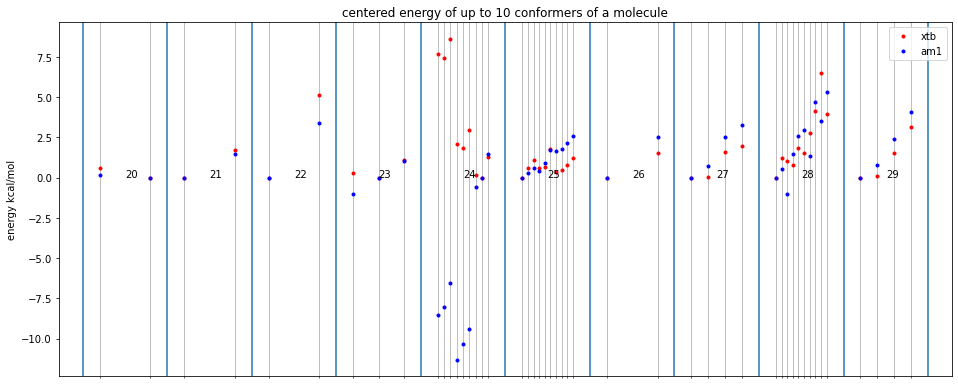

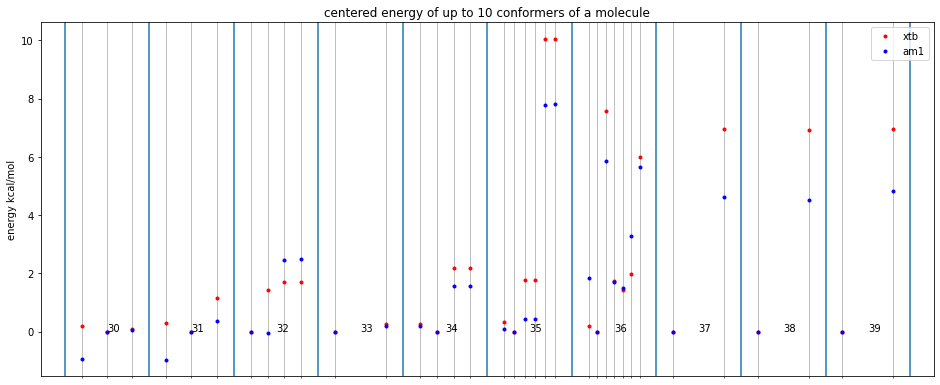

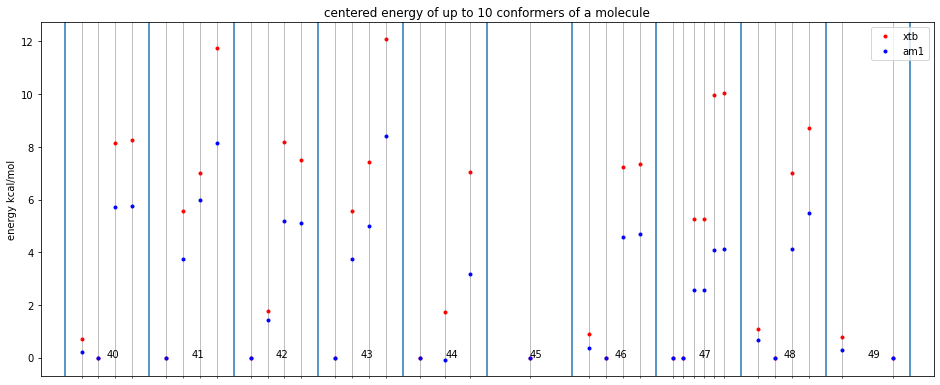

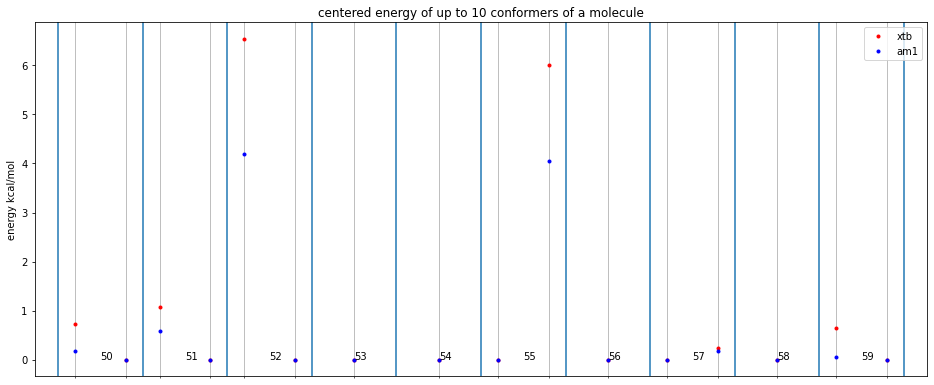

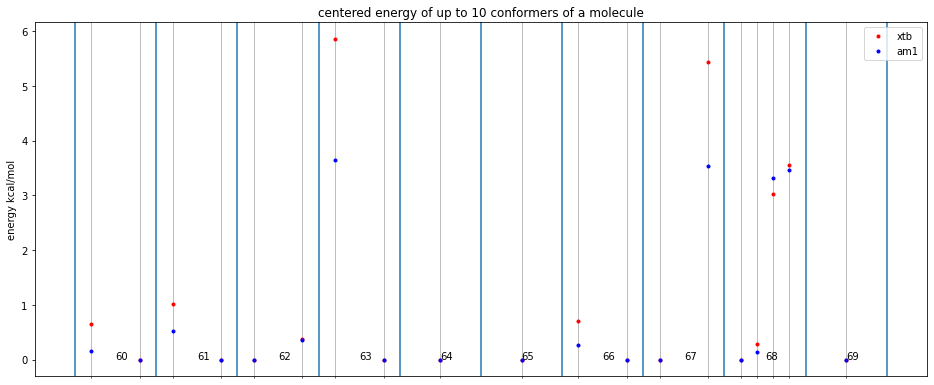

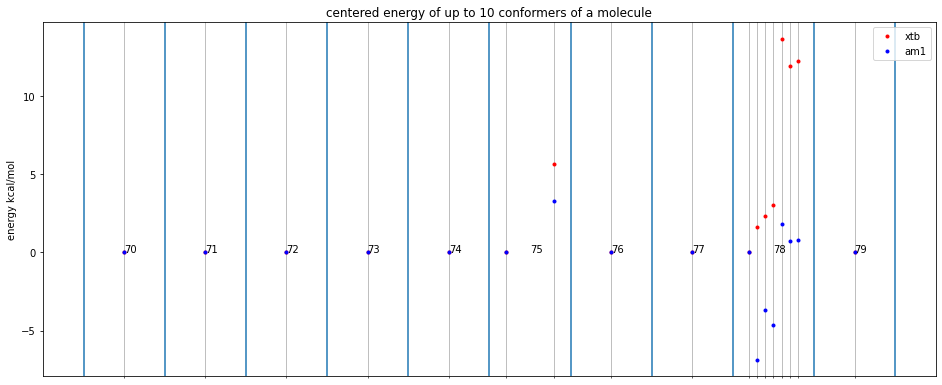

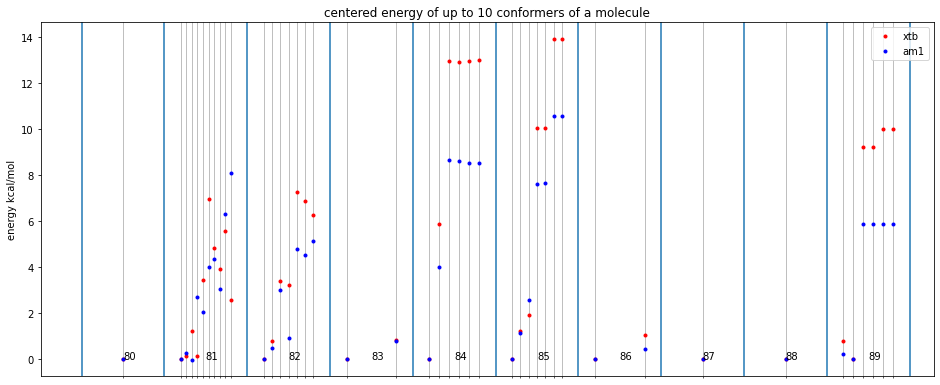

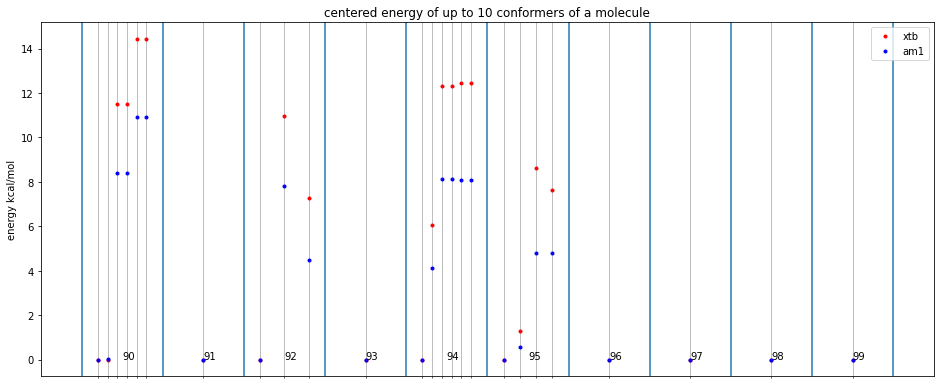

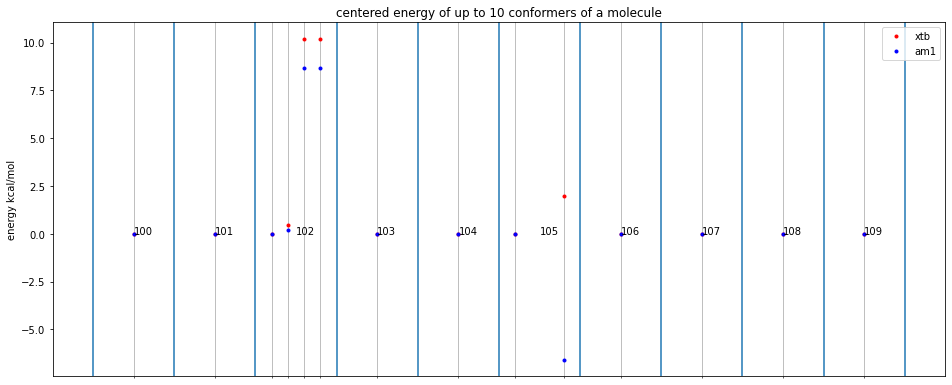

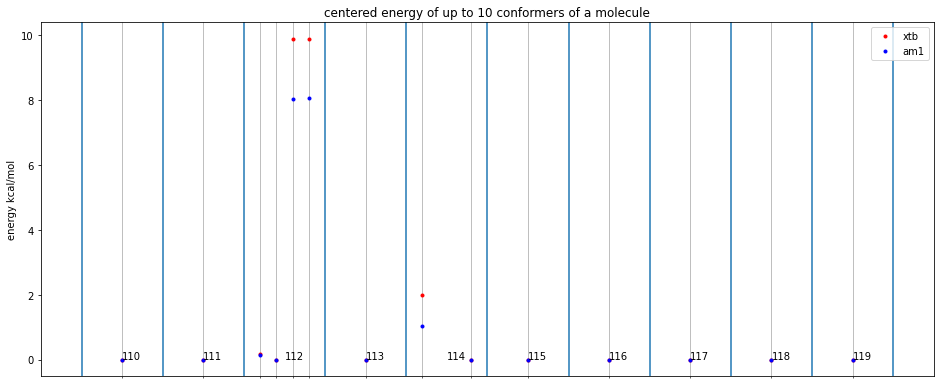

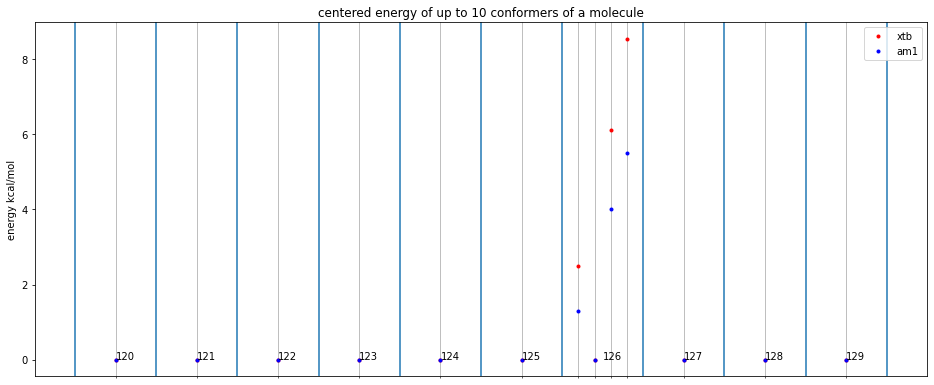

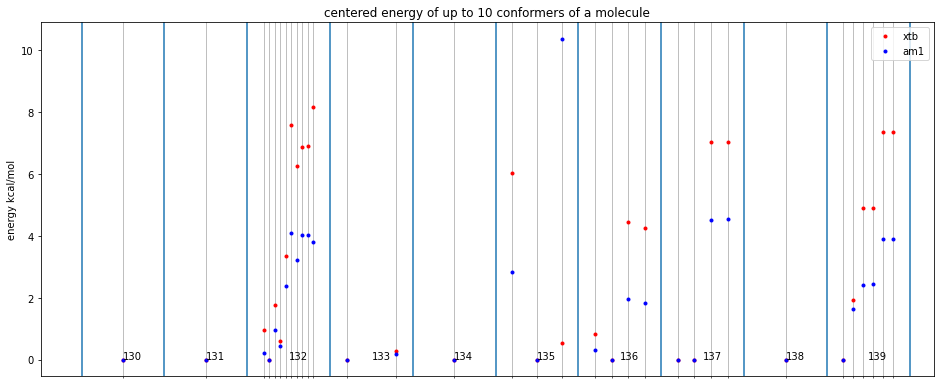

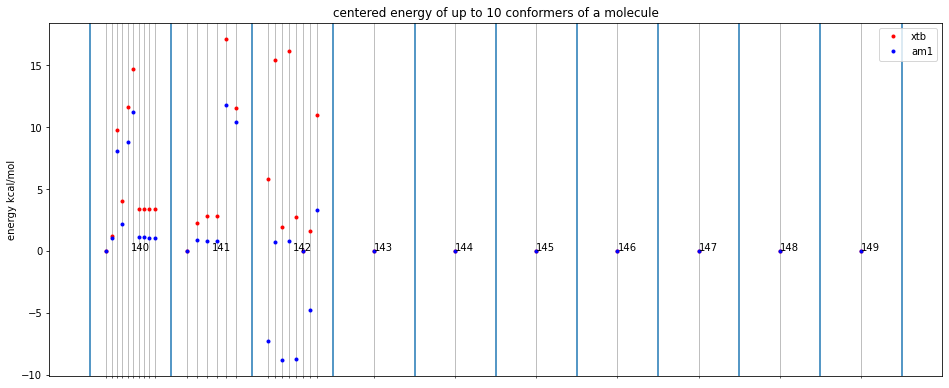

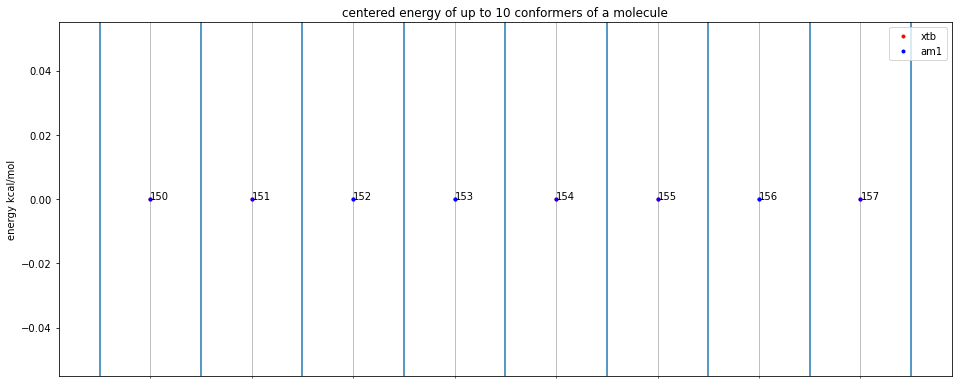

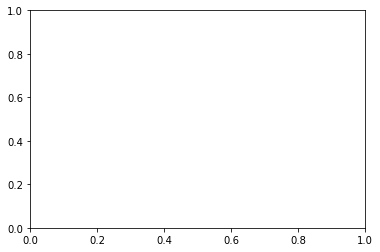

In [130]:
mols = np.array(list(data.keys()))
molidx = np.arange(len(mols))
max_per_graph = 10
w = 0.3

    
for i in range(int(np.ceil(len(mols)/max_per_graph))):
    idxs = np.arange(i*max_per_graph, min(len(mols), (i+1)*max_per_graph) )
    c_idxs_graph = []
    for ii in idxs:
        name = mols[ii]
        mol_info = data[name]
        xtb_conf = mol_info["xtb_centered"]
        am1_conf = mol_info["am1_centered"]
        num_conf = mol_info["num_conformers"]
        
        for confidx in range(num_conf):
            # make an offset for the conformer
            vis_location = ii if num_conf == 1 else ii - w + 2*w*confidx/(num_conf-1)
            aa, = plt.plot(vis_location, xtb_conf[confidx], color="red", marker=".", linestyle="None")
            ab, = plt.plot(vis_location, am1_conf[confidx], color="blue", marker=".", linestyle="None")
            c_idxs_graph.append(vis_location)
        
        # plot the index of the molecule
        plt.text(ii, 0, str(ii), color="black")
        
    ax = plt.gca()
    plt.legend((aa, ab), ("xtb", "am1"))
    plt.title("centered energy of up to 10 conformers of a molecule")
    plt.ylabel("energy kcal/mol")
    ax.set_xticks(c_idxs_graph, minor=True)
    ax.set_xticks([])
    
    # split up so it's easier to see which molecule is which
    plt.axvline(x=idxs[0] - 0.5)
    for i in idxs: plt.axvline(x=i+0.5)
    
    ax.tick_params(axis="x", top=False,bottom=False)
    fig = plt.gcf()
    fig.set_size_inches(16, 6.5)
    plt.grid(axis="x",which="both")
    plt.show()
    plt.cla()

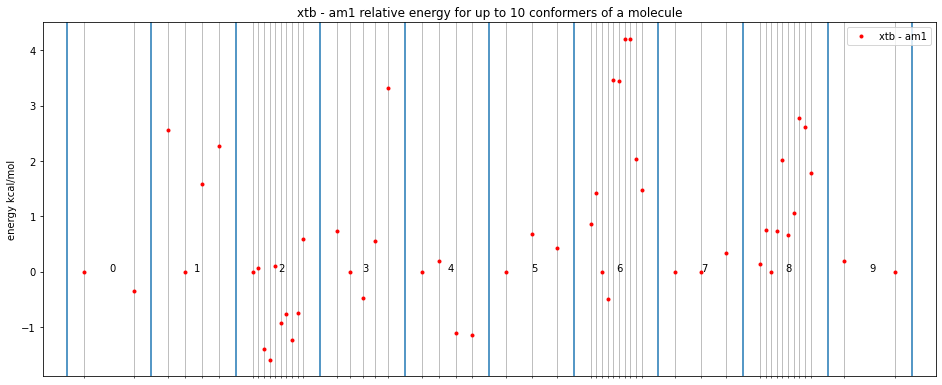

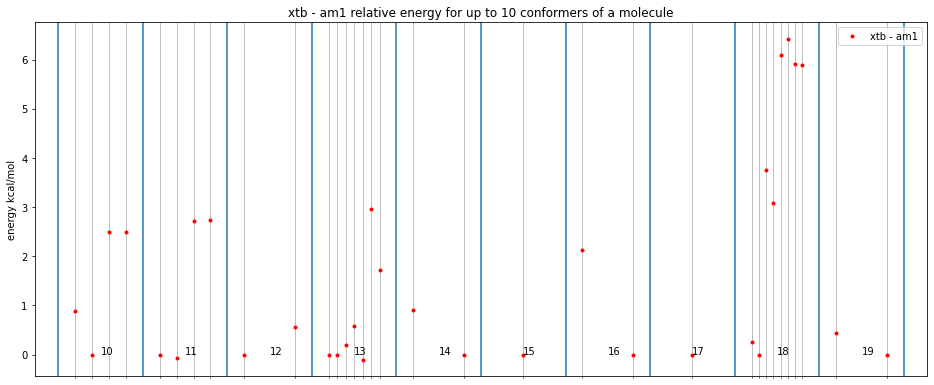

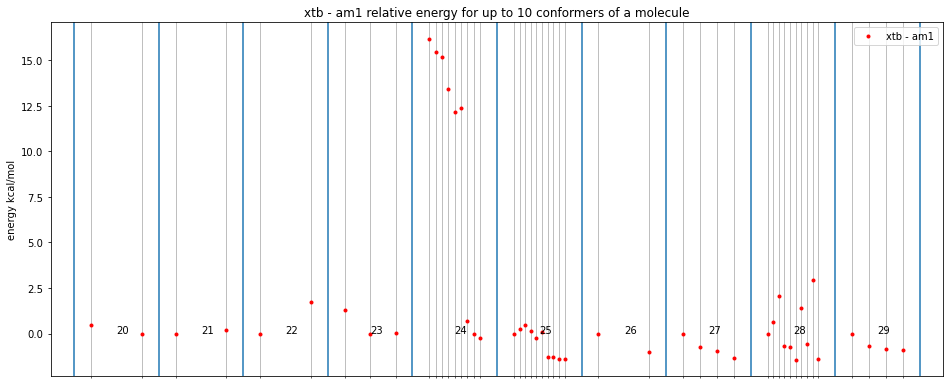

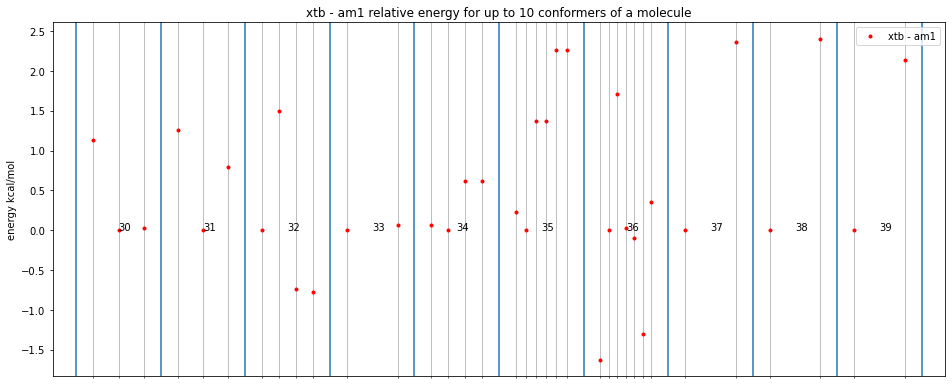

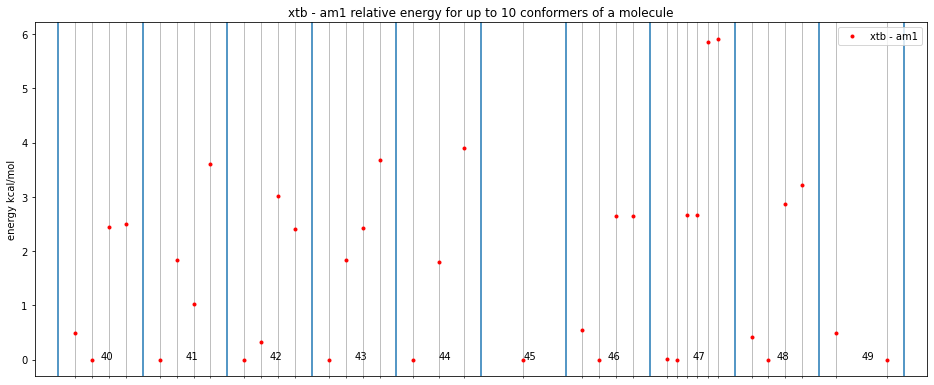

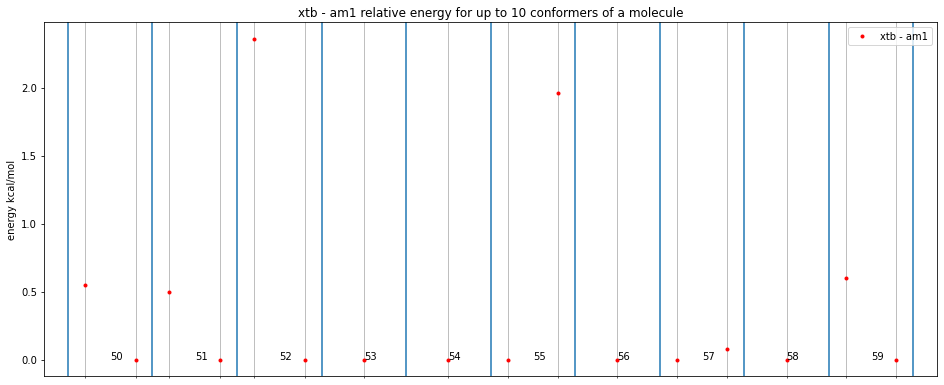

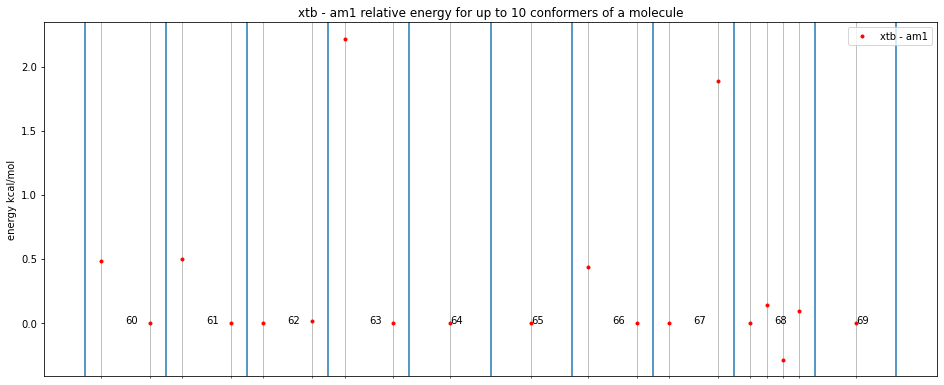

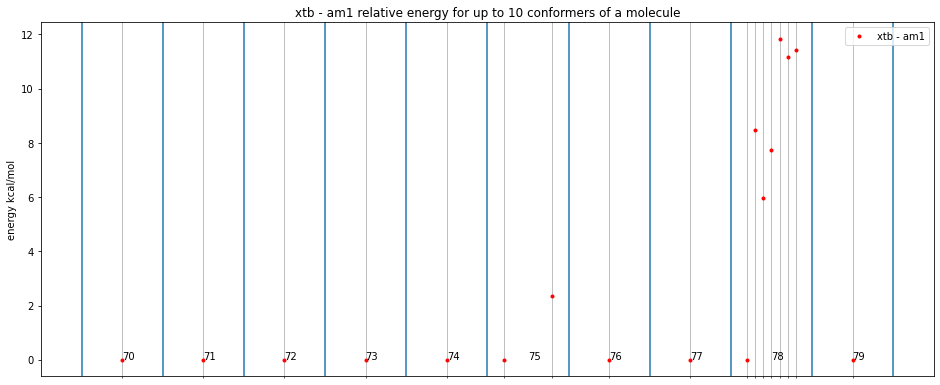

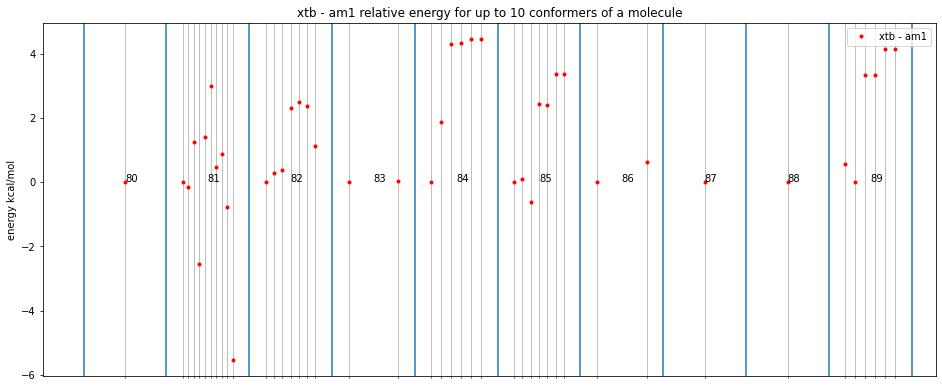

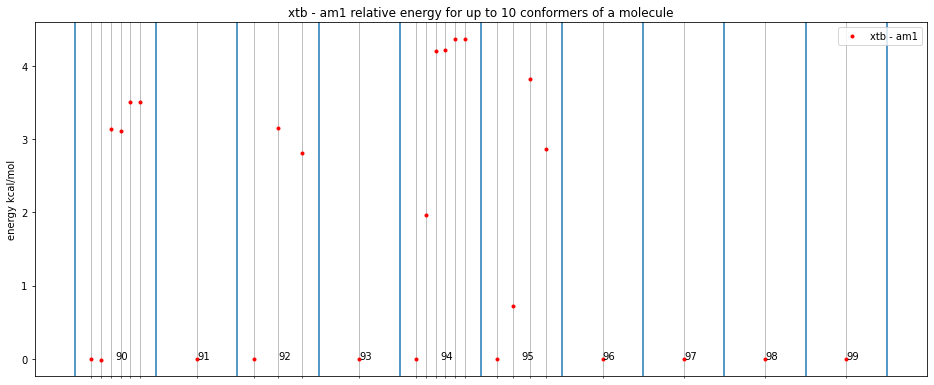

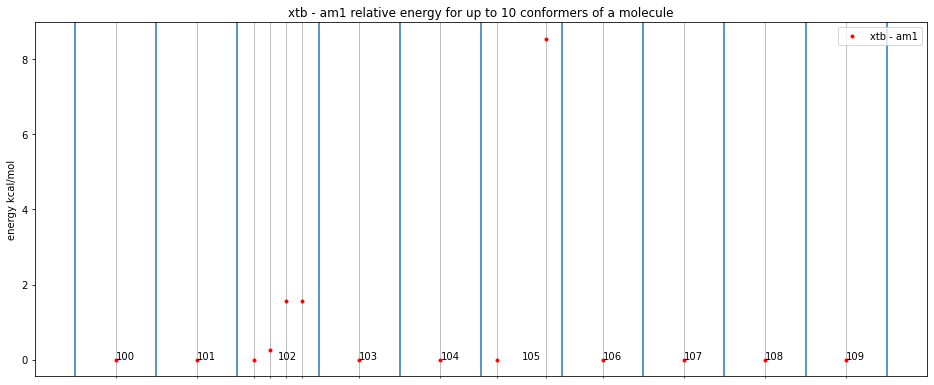

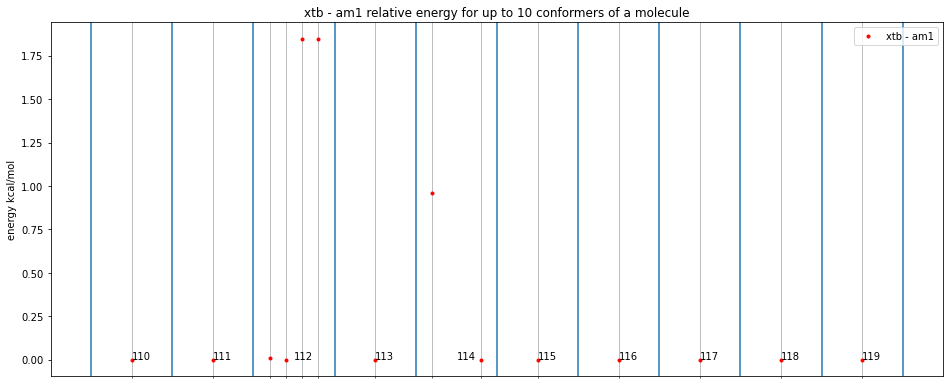

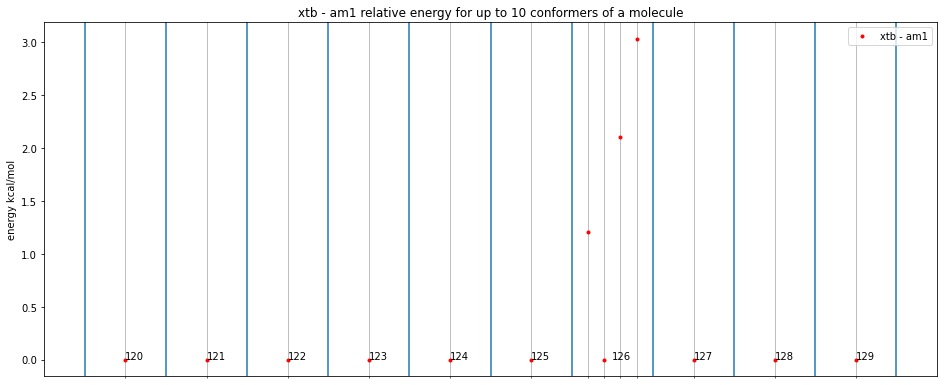

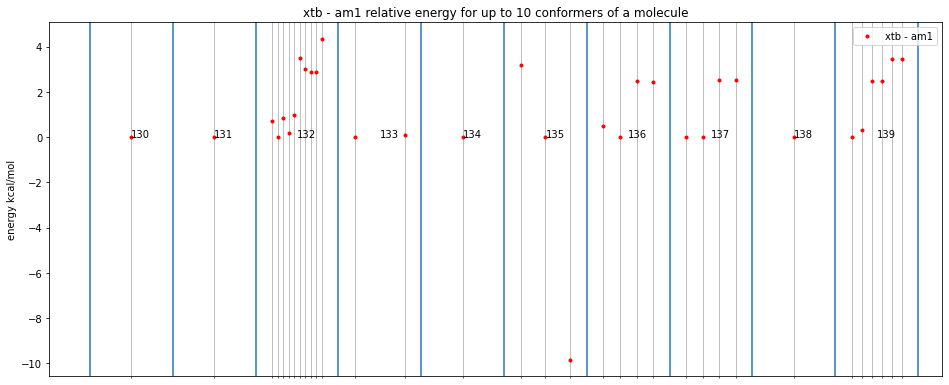

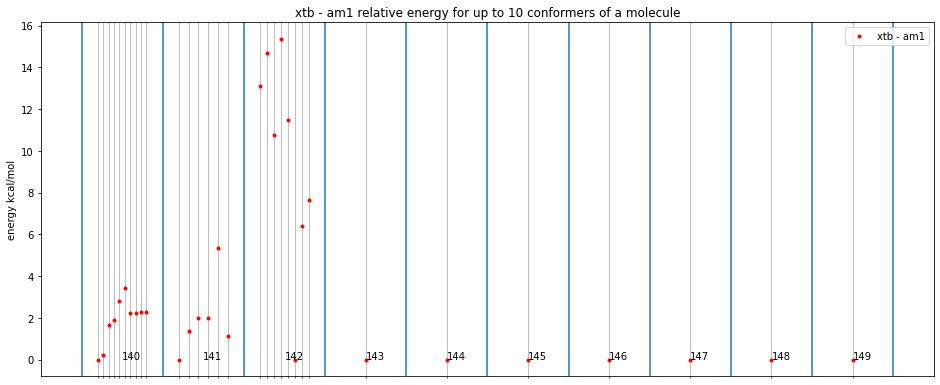

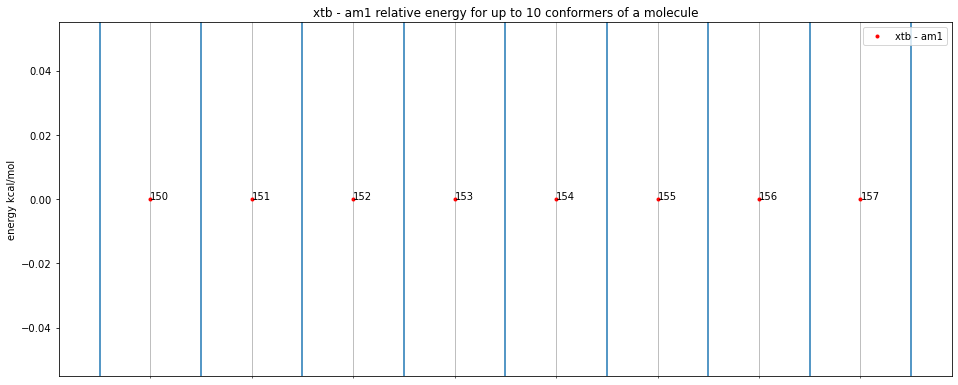

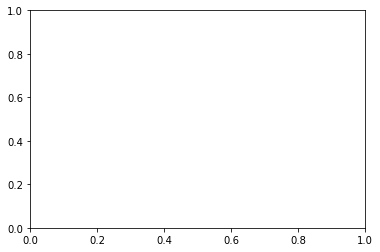

In [129]:
# plot differences between xtb, am1 for each conformer

for i in range(int(np.ceil(len(mols)/max_per_graph))):
    idxs = np.arange(i*max_per_graph, min(len(mols), (i+1)*max_per_graph) )
    c_idxs_graph = []
    for ii in idxs:
        name = mols[ii]
        mol_info = data[name]
        diff = mol_info["conformer_energy_difference"]
        num_conf = mol_info["num_conformers"]
        
        for confidx in range(num_conf):
            # make an offset for the conformer
            vis_location = ii if num_conf == 1 else ii - w + 2*w*confidx/(num_conf-1)
            aa, = plt.plot(vis_location, diff[confidx], color="red", marker=".", linestyle="None")
            c_idxs_graph.append(vis_location)
        
        # plot the index of the molecule
        plt.text(ii, 0, str(ii), color="black")
        
    ax = plt.gca()
    plt.legend((aa,), ("xtb - am1",))
    plt.title("xtb - am1 relative energy for up to 10 conformers of a molecule")
    plt.ylabel("energy kcal/mol")
    ax.set_xticks(c_idxs_graph, minor=True)
    ax.set_xticks([])
    
    # split up so it's easier to see which molecule is which
    plt.axvline(x=idxs[0] - 0.5)
    for i in idxs: plt.axvline(x=i+0.5)
        
    ax.tick_params(axis="x", top=False,bottom=False)
    fig = plt.gcf()
    fig.set_size_inches(16, 6.5)
    plt.grid(axis="x",which="both")
    plt.show()
    plt.cla()